## Deliverable 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl 
from math import ceil

from IPython.display import Image, display

## Reading the data

In [2]:
df_train = pd.read_csv('train.csv', index_col = "carID")
df_test = pd.read_csv('test.csv', index_col = "carID")

## Metadata

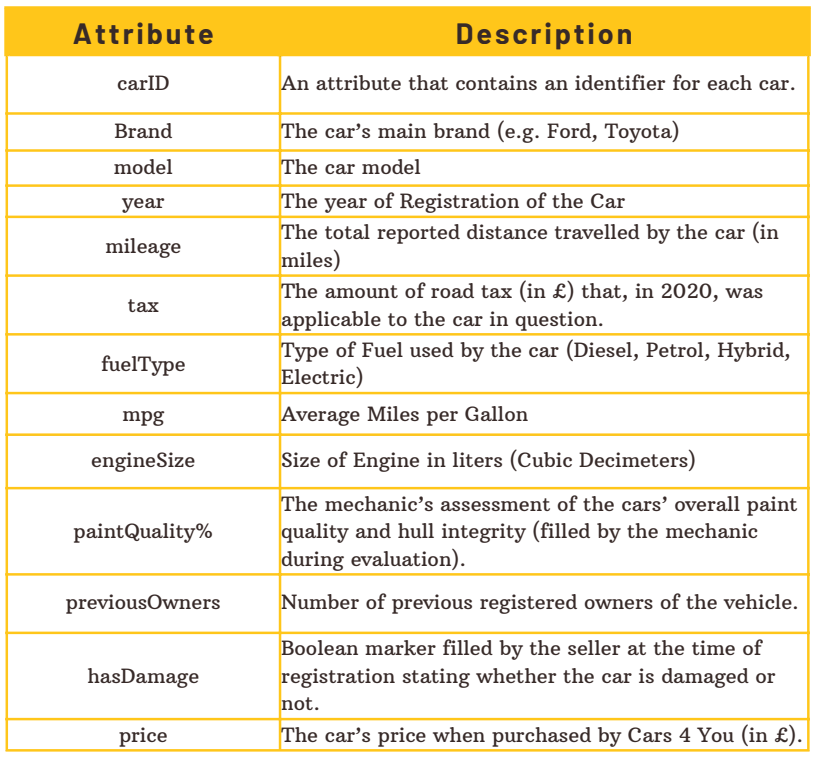

In [3]:
display(Image(filename="metadata.png", width=500))

## Characteristics of our data

In [4]:
list(df_train.columns)
#y=price
#x=others

['Brand',
 'model',
 'year',
 'price',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize',
 'paintQuality%',
 'previousOwners',
 'hasDamage']

In [5]:
df_train.head(20)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,VW,Golf,2016.0,22290,Semi-Auto,28421.000000,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,Toyota,Yaris,2019.0,13790,Manual,4589.000000,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.000000,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,Ford,FIESTA,2018.0,12500,anual,9102.000000,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.000000,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0
14704,BMW,3 Series,2014.0,8199,anual,101153.348285,Diesel,30.0,65.700000,2.0,74.0,0.000000,0.0
6924,Audi,A3,2017.0,16089,Manual,21396.000000,Petrol,20.0,60.100000,1.4,75.0,4.000000,0.0
50783,Skoda,Octavia,2017.0,7500,Manual,116750.000000,Diesel,145.0,68.900000,1.6,59.0,4.000000,0.0
67071,VW,Passat,2017.0,15999,Semi-Auto,30339.000000,Diesel,150.0,62.800000,2.0,85.0,4.000000,0.0


In [6]:
df_test.head(20)

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.50000,1.6,61.0,3.0,0.0
106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.20000,2.0,60.0,2.0,0.0
80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.40000,1.5,94.0,2.0,0.0
100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.10000,1.2,77.0,1.0,0.0
81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.40000,2.0,45.0,4.0,0.0
85391,Ford,Fiesta,2018.000000,Manual,29626.000000,Petrol,145.0,65.70000,1.0,64.0,1.0,0.0
82175,BMW,X1,2016.000000,Manual,57717.000000,Diese,125.0,58.90000,2.0,50.0,1.0,0.0
95250,Mercedes,B Class,2017.000000,Manual,14005.000000,Diesel,145.0,65.70000,NaN,64.0,4.0,0.0
85071,Ford,Focus,2011.000000,Manual,68274.000000,Petrol,145.0,47.90000,1.6,71.0,4.0,0.0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75973 entries, 69512 to 15795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74452 non-null  object 
 1   model           74456 non-null  object 
 2   year            74482 non-null  float64
 3   price           75973 non-null  int64  
 4   transmission    74451 non-null  object 
 5   mileage         74510 non-null  float64
 6   fuelType        74462 non-null  object 
 7   tax             68069 non-null  float64
 8   mpg             68047 non-null  float64
 9   engineSize      74457 non-null  float64
 10  paintQuality%   74449 non-null  float64
 11  previousOwners  74423 non-null  float64
 12  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.1+ MB


In [8]:
df_train.describe(include='all')

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,74452,74456,74482.000000,75973.000000,74451,74510.000000,74462,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
unique,72,735,NaN,NaN,40,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN
top,Ford,Focus,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,14808,6353,NaN,NaN,38050,NaN,37995,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2017.096611,16881.889553,NaN,23004.184088,NaN,120.329078,55.152666,1.660136,64.590667,1.994580,0.0
std,NaN,NaN,2.208704,9736.926322,NaN,22129.788366,NaN,65.521176,16.497837,0.573462,21.021065,1.472981,0.0
min,NaN,NaN,1970.000000,450.000000,NaN,-58540.574478,NaN,-91.121630,-43.421768,-0.103493,1.638913,-2.345650,0.0
25%,NaN,NaN,2016.000000,10200.000000,NaN,7423.250000,NaN,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,NaN,NaN,2017.000000,14699.000000,NaN,17300.000000,NaN,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,NaN,NaN,2019.000000,20950.000000,NaN,32427.500000,NaN,145.000000,62.800000,2.000000,82.000000,3.000000,0.0


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32567 entries, 89856 to 99627
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           31918 non-null  object 
 1   model           31917 non-null  object 
 2   year            31914 non-null  float64
 3   transmission    31944 non-null  object 
 4   mileage         31878 non-null  float64
 5   fuelType        31911 non-null  object 
 6   tax             29259 non-null  float64
 7   mpg             29279 non-null  float64
 8   engineSize      31939 non-null  float64
 9   paintQuality%   31942 non-null  float64
 10  previousOwners  31970 non-null  float64
 11  hasDamage       31970 non-null  float64
dtypes: float64(8), object(4)
memory usage: 3.2+ MB


In [10]:
df_test.describe(include='all')

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,31918,31917,31914.000000,31944,31878.000000,31911,29259.000000,29279.000000,31939.000000,31942.000000,31970.000000,31970.0
unique,64,593,NaN,38,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN
top,Ford,Focus,NaN,Manual,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,6360,2721,NaN,16312,NaN,16113,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2017.102299,NaN,22952.658921,NaN,120.569239,55.210728,1.665377,64.446667,2.006118,0.0
std,NaN,NaN,2.207969,NaN,22132.758713,NaN,65.560570,17.644635,0.574467,21.142188,1.472310,0.0
min,NaN,NaN,1991.000000,NaN,-58540.574478,NaN,-91.121630,-43.421768,-0.103493,1.638913,-2.345650,0.0
25%,NaN,NaN,2016.000000,NaN,7298.250000,NaN,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,NaN,NaN,2017.000000,NaN,17225.500000,NaN,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,NaN,NaN,2019.000000,NaN,32500.000000,NaN,145.000000,62.800000,2.000000,82.000000,3.000000,0.0


## Duplicates

Check duplicates:

In [11]:
df_train.reset_index().duplicated().sum() #reset_index() to consider the index

np.int64(0)

In [12]:
df_test.reset_index().duplicated().sum() #reset_index() to consider the index

np.int64(0)

Check duplicates in carId:

In [13]:
df_train.shape

(75973, 13)

In [14]:
df_test.shape

(32567, 12)

In [15]:
print(f'Train: {len(set(df_train.index))}\nTest: {len(set(df_test.index))}')

Train: 75973
Test: 32567


In [16]:
#There are also no duplicates in carId!!

## Unique Values- Categorical Variables

There is clearly a problem with the categories of every categorical variable.

### *Brands*

In [17]:
print(f' Typos in brands: {set(df_train['Brand'].unique()).union(set(df_test['Brand'].unique()))}')

 Typos in brands: {nan, 'yundai', 'ford', 'skod', 'pel', 'FORD', 'mw', 'TOYOT', 'Hyundai', 'BMW', 'hyunda', 'oyot', 'AUD', 'OPEL', 'Hyunda', 'For', 'Mercede', 'SKODA', 'HYUNDAI', 'mercede', 'MERCEDES', 'mercedes', 'v', 'Ope', 'toyot', 'FOR', 'Toyot', 'toyota', 'KODA', 'ercede', 'for', 'opel', 'ERCEDES', 'Opel', 'yunda', 'skoda', 'Skod', 'or', 'UDI', 'ORD', 'YUNDAI', 'Ford', 'OYOTA', 'hyundai', 'Skoda', 'Mercedes', 'PEL', 'bm', 'V', 'MERCEDE', 'W', 'BM', 'ope', 'ord', 'udi', 'audi', 'ercedes', 'kod', 'HYUNDA', 'SKOD', 'vw', 'ud', 'OPE', 'koda', 'oyota', 'Audi', 'MW', 'w', 'Toyota', 'TOYOTA', 'pe', 'Aud', 'aud', 'bmw', 'M', 'VW', 'AUDI'}


In [18]:
brands = {
    'TOYOTA': ['Toyot', 'oyota', 'Toyota', 'toyota', 'TOYOT', 'OYOTA', 'toyot', 'oyot'],
    'AUDI': ['Audi', 'udi', 'Aud', 'aud', 'AUD', 'UDI', 'ud', 'audi'],
    'FORD': ['FOR', 'ord', 'For', 'ford', 'ORD', 'or', 'for', 'Ford'],
    'VOLKSWAGEN': ['v', 'VW', 'V', 'vw'],
    'BMW': ['w','MW', 'BM', 'bmw', 'mw', 'W', 'M', 'bm'],
    'SKODA': ['koda', 'Skod', 'Skoda', 'SKOD', 'kod', 'KODA', 'skod', 'skoda',],
    'OPEL': ['Ope', 'opel', 'pel', 'PEL', 'OPE', 'ope', 'pe', 'Opel'],
    'MERCEDES': ['mercedes', 'Mercede', 'Mercedes', 'ercedes', 'ERCEDES', 'ercede', 'MERCEDE', 'mercede'],
    'HYUNDAI': ['hyundai', 'Hyunda', 'Hyundai', 'yundai', 'yunda', 'HYUNDA', 'hyunda', 'YUNDAI']
}

for brand, typos in brands.items():
    df_train['Brand'] = df_train['Brand'].apply( lambda x: brand if x in typos else x)
    df_test['Brand'] = df_test['Brand'].apply( lambda x: brand if x in typos else x)

df_train['Brand'].unique()

array(['VOLKSWAGEN', 'TOYOTA', 'AUDI', 'FORD', 'BMW', 'SKODA', 'OPEL',
       'MERCEDES', 'HYUNDAI', nan], dtype=object)

In [19]:
df_test['Brand'].unique()

array(['HYUNDAI', 'VOLKSWAGEN', 'BMW', 'OPEL', 'FORD', 'MERCEDES',
       'SKODA', 'TOYOTA', 'AUDI', nan], dtype=object)

In [20]:
df_train.head(20)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,VOLKSWAGEN,Golf,2016.0,22290,Semi-Auto,28421.000000,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,TOYOTA,Yaris,2019.0,13790,Manual,4589.000000,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,AUDI,Q2,2019.0,24990,Semi-Auto,3624.000000,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,FORD,FIESTA,2018.0,12500,anual,9102.000000,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.000000,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0
14704,BMW,3 Series,2014.0,8199,anual,101153.348285,Diesel,30.0,65.700000,2.0,74.0,0.000000,0.0
6924,AUDI,A3,2017.0,16089,Manual,21396.000000,Petrol,20.0,60.100000,1.4,75.0,4.000000,0.0
50783,SKODA,Octavia,2017.0,7500,Manual,116750.000000,Diesel,145.0,68.900000,1.6,59.0,4.000000,0.0
67071,VOLKSWAGEN,Passat,2017.0,15999,Semi-Auto,30339.000000,Diesel,150.0,62.800000,2.0,85.0,4.000000,0.0


### *Models*

In [21]:
models_typos=set(df_train['model'].unique()).union(set(df_test['model'].unique()))
print(f'Nº of unique values: {len(models_typos)}')

Nº of unique values: 801


In [22]:
models = {
    # Volkswagen
    'GOLF': ['Golf','Gol', ' GOLF', ' golf', ' golf s', ' Gol', ' Golf SV', ' golf sv', 'Golf', 'golf', ' GOLF', ' Golf S', ' gol', ' GOL', ' Golf'],
    'POLO': ['Polo','Pol','polo', ' POLO', ' polo', ' Pol', ' Polo','POLO', ' POL'],
    'PASSAT': [' PASSA', 'Passat', ' PASSAT', ' Passa', ' passa', ' Passa', ' Passa', ' passat', ' Passat'],
    'TIGUAN': ['Tiguan',' Tiguan', ' TIGUAN','Tigua', ' tiguan', ' Tigua', ' TIGUA', ' tiguan', ' Tiguan', 'TIGUAN', 'tiguan', ' tigua'],
    'TIGUAN_ALLSPACE': [' tiguan allspace', ' Tiguan Allspac', 'Tiguan Allspace', ' TIGUAN ALLSPACE', ' Tiguan Allspace'],
    'TOUAREG': ['Touareg', ' TOUAREG', ' touareg', ' Touare',' Touareg'],
    'T_ROC': ['T-Roc', ' T-Ro', ' t roc', ' T-Roc'],
    'T_CROSS': ['T-Cross', ' T-CROSS',' t-cros', ' t cross', ' T-Cros', ' T-RO', ' T-ROC', ' t-roc', ' t-cross', 'T-Cross', ' T-Cross', ],
    'ARTEON': ['Arteon', ' arteon', ' Arteo', ' ARTEON',  ' Arteon', 'Arteo'],
    'SHARAN': ['Sharan', ' sharan', ' SHARAN', ' Shara',' Sharan',' Sharan', ' SHARA'],
    'JETTA': ['Jetta',' Jetta',' JETTA', ' jetta'],
    'CC': ['CC', ' cc',' CC'],
    'CARAVELLE': ['Caravelle',  ' caravelle', ' Caravell', ' Caravelle'],
    'CALIFORNIA': ['California',' California', ' Californi'],
    'CADDY': ['Caddy',' Caddy'],
    'CADDY_MAXI': ['Caddy Maxi Life', ' Caddy Maxi Lif',' Caddy Maxi', ' Caddy Maxi Life', ' Caddy Life'],
    'TOURAN': ['Touran', ' touran', ' TOURAN', ' Touran','Toura',' TOURA', ' Toura'],
    'GOLF_SV': ['Golf SV','Golf S', ' golf sv', ' GOLF SV','Golf SV'],
    'BEETLE': ['Beetle', ' beetle', ' Beetl', ' Beetle'],
    'SCIROCCO': ['Scirocco', ' scirocco', ' Scirocc', ' SCIROCCO',' Scirocco'],
    'UP': ['Up', ' up', ' UP',' Up', ' U', 'U', 'UP'],
    'AMAROK': ['Amarok', ' Amarok',' amarok',' Amaro'],
    'EOS': ['Eos', ' Eos'],
    'FOX': [' fox', 'Fox', ' Fox'],

    # Ford
    'FOCUS': ['Focus','FOCUS', ' focus', ' FOCUS', ' FOCU', ' Focu', ' focu', ' Focus', 'Focu', 'focus'],
    'FIESTA': ['Fiesta', ' FIESTA', ' Fiest','fiesta', ' fiesta', ' Fiest', ' FIEST', ' fiest',' Fiesta', 'Fiest'],
    'MONDEO': ['Mondeo', ' MONDEO', ' mondeo', ' Monde',  ' MONDE',' Mondeo'],
    'KUGA': ['Kuga', ' KUGA', ' kuga', ' Kug', ' kuga',' Kuga','kuga'],
    'GALAXY': ['Galaxy', ' GALAXY', ' Galax', ' galax', ' Galaxy',' galaxy'],
    'S_MAX': ['S-MAX', ' s-max', ' S-MA', ' s-ma', ' S-MAX'],
    'B_MAX': ['B-MAX', ' B-MA', ' b-max', ' B-MA', ' B-MAX','B-MA'],
    'ECOSPORT': ['EcoSport', ' ecosport', ' ECOSPORT', ' EcoSpor',  ' EcoSport'],
    'PUMA': ['Puma', ' puma', ' PUMA',' Puma', ' Pum', 'Pum'],
    'TOURNEO_CUSTOM': [' Transit Tourneo', 'Tourneo Custom',' tourneo custom', ' Tourneo Custo', ' Tourneo Custom'],
    'TOURNEO_CONNECT': [' Grand Tourneo Connec', 'Grand Tourneo Connect', 'Tourneo Connect', ' Grand Tourneo Connect', ' tourneo connect', ' Tourneo Connect'],
    'KA': ['Ka', ' KA', ' ka',' Ka', ' K'],
    'KA_PLUS': [ ' Ka+', ' ka+', ' KA+','Ka+', 'ka+'], 
    'C_MAX': ['C-MAX', ' C-MAX', ' c-max', ' C-MA'],
    'GRAND_C_MAX': [' Grand C-MAX', ' GRAND C-MAX', ' Grand C-MA', ' grand c-max', 'Grand C-MAX'],
    'EDGE': ['Edge', ' edge', ' EDGE',' Edge',' Edg'],
    'MUSTANG': ['Mustang', ' mustang',' Mustang'],
    'FUSION': ['Fusion',' Fusion', ' fusion'],
    'STREETKA': ['Streeka',' Streetka'],
    'RANGER': ['Ranger', ' Ranger'],
    'ESCORT': ['Escort', ' Escort'],

    # Opel
    'CORSA': ['Corsa','corsa', ' corsa', ' Cors', ' CORSA', ' cors',' CORS',' Corsa'],
    'ASTRA': ['Astra','ASTRA','astra', ' astra', ' ASTRA', ' ASTRA', ' Astr', 'Astra', ' Astra'],
    'INSIGNIA': ['Insignia','Insigni', ' INSIGNIA', ' insignia', ' Insigni', ' INSIGNI',' Insignia'],
    'MOKKA': ['Mokka ', 'Mokka', 'Mokk', ' MOKKA', ' Mokka X', ' mokka', ' mokka x', ' MOKKA X', ' Mokk', ' Mokk', ' Mokka ', ' mokka ', ' Mokka X',' Mokka', 'Mokka X'],
    'ZAFIRA': [' ZAFIR', 'Zafira', ' zafira', ' ZAFIRA', ' Zafir', ' Zafira Tourer', ' Zafira Toure', ' ZAFIRA TOURER', 'Zafira Tourer',' Zafira','Zafir', ' zafira tourer'],
    'VIVA': ['Viva', ' viva', ' VIVA',' Viva', ' Viv',' Viva', 'viva'],
    'MERIVA': ['Meriva', ' meriva', ' MERIVA', ' Meriv',' Meriva'],
    'ADAM': ['Adam', ' adam', ' Ada', ' ADAM', ' Adam'],
    'COMBO_LIFE': ['Combo Life','COMBO LIFE', ' combo life', ' COMBO LIFE', ' Combo Lif',' Combo Life'],
    'CROSSLAND_X': ['Crossland X', ' CROSSLAND X', ' crossland x',' Crossland ', ' CrosslandX',' Crossland X'],
    'GRANDLAND_X': ['Grandland X',' Grandland X', ' grandland x', ' GRAND LAND X', ' Grandland ', ' grandland ',' Grandland X', ' GRANDLAND X'],
    'GTC': ['GTC', ' gtc',' GTC','gtc'],
    'ANTARA': [' antara', 'Antara',' Antara'],
    'VIVARO': ['Vivaro',' Vivaro'],
    'VECTRA': ['Vectra', ' Vectra',' VECTRA'],
    'AGILA': ['Agila',  ' Agila', ' AGILA'],
    'TIGRA': ['Tigra', ' Tigra'],
    'CASCADA': ['Cascada',' Cascada'],
    'AMPERA': ['Ampera', ' Ampera'],

    # BMW
    'SERIES_1': ['1 Series','1 series', '1 SERIES', ' 1 Series', ' 1 SERIES', ' 1 serie', ' 1 Serie', ' 1 SERIE', ' 1 series'],
    'SERIES_2': ['2 series', '2 Series', '2 Serie', ' 2 Series', ' 2 SERIES', ' 2 Serie', ' 2 serie', ' 2 series', '2 series'],
    'SERIES_3': ['3 Series','3 Serie', ' 3 Series', ' 3 SERIES', ' 3 Serie', ' 3 serie', ' 3 series'],
    'SERIES_4': ['4 Series', ' 4 serie','4 series',' 4 Series', ' 4 SERIES', ' 4 Serie', ' 4 series'],
    'SERIES_5': [' 5 SERIE', '5 Series', '5 SERIES', ' 5 Series', ' 5 SERIES', ' 5 Serie', ' 5 series'],
    'SERIES_6': ['6 Series', ' 6 Series', ' 6 SERIES', ' 6 Serie', ' 6 series'],
    'SERIES_7': ['7 Series', ' 7 Series', ' 7 SERIES', ' 7 Serie', ' 7 series'],
    'SERIES_8': ['8 Series',' 8 SERIES', '8 SERIES', ' 8 Serie',  ' 8 Series', ' 8 series'],
    'X1': ['X1', ' x1',' X1','x1'],
    'X2': ['X2', ' IX2', ' x2',' X2'],
    'X3': ['X3', ' x3',' X3'],
    'X4': ['X4', ' x4',' X4'],
    'X5': ['X5', ' x5', ' X5'],
    'X6': ['X6', ' x6',' X6'],
    'X7': ['X7', ' x7',' X7'],
    'Z3': ['Z3',' Z3'],
    'Z4': ['Z4', ' z4', ' Z4'],
    'M2': ['M2', ' M2'],
    'M3': ['M3', ' m3',' M3'],
    'M4': ['M4', ' m4',' M4'],
    'M5': ['M5', ' M5', ' m5'],
    'M6': ['M6',' M6'],

    # Audi
    'A1': ['A1', ' a1',' A1'],
    'A2': ['A2',' A2'],
    'A3': ['A3', ' a3', ' A 3',  ' A3', ' a3'],
    'A4': ['A4', ' a4', ' A4', ' a4'],
    'A5': ['A5', ' a5', ' A5', 'a5'],
    'A6': ['A6', ' A6', ' a6'],
    'A7': ['A7', ' a7', ' A7'],
    'A8': ['A8',  ' A8','a8'],
    'Q2': ['Q2', ' q2', ' Q2'],
    'Q3': ['Q3', ' q3', ' Q3'],
    'Q5': ['Q5', ' q5',  ' Q5', ' q5','q5'],
    'Q7': ['Q7', ' q7', ' Q7'],
    'Q8': ['Q8', ' q8', ' Q8'],
    'S3': ['S3',  ' s3',' S3'],
    'S4': ['S4', ' S4'],
    'S5': ['S5',' S5'],
    'S8': ['S8',' S8'],
    'RS3': ['RS3',' RS3'],
    'RS4': ['RS4', ' RS4'],
    'RS5': ['RS5',' RS5'],
    'RS6': ['RS6', ' RS6'],
    'RS7': ['RS7', ' RS7'],
    'SQ5': ['SQ5',' SQ5'],
    'SQ7': ['SQ7',' SQ7',' sq7'],
    'TT': ['TT', ' TT', ' tt', ' T'],
    'R8': ['R8',' r8',' R8'],

    # Mercedes
    'A_CLASS': ['A-Class','a class', 'A CLASS', ' A-Class', ' a class', ' A CLASS', 'A Clas', ' a clas', 'A-Class', ' A Class', 'A CLASS', 'A Clas', ' a class', ' A Class', 'A CLASS', ' A Clas', ' a class','A Class'],
    'B_CLASS': ['B-Class','b class', 'B CLASS', ' b class', ' B Clas', ' B Class', ' B CLASS', ' b class', 'B Class'],
    'C_CLASS': ['C-Class','C Clas', 'C CLASS','c class', ' c class', ' C Class', ' C Clas', ' c clas', ' C Class', 'C CLASS', ' c class', ' C CLAS',' C CLASS', 'C Class'],
    'E_CLASS': ['E-Class', 'E CLASS', ' E Clas', ' e class', 'E Class', 'E-Class', ' E Class', 'E CLASS', ' e class', ' E Class', 'E CLASS', ' e class', ' E CLASS', 'e class' ],
    'S_CLASS': ['S-Class','S Class', 'S CLASS', ' s class', ' S Clas',' S Class', 'S CLASS',' S CLASS'],
    'CLA_CLASS': ['CLA-Class',' CLA CLASS', 'CLA CLASS','CLA Class', ' cla class', ' CLA Class',' CLA Class', ' CLA Clas'],
    'CLS_CLASS': ['CLS-Class', 'CLS Class','CLS CLASS', ' cls class', ' CL Class', ' cl class', ' CL CLASS', ' CL Clas', ' CLS Class', ' CLS CLASS', ' CLS Clas'],
    'GLA_CLASS': ['GLA-Class',' GLA CLASS', 'GLA CLASS', ' gla class', ' GLA Class', ' GLA Clas','GLA Class'],
    'GLB_CLASS': ['GLB-Class', ' glb class', 'GLB Class',' GLB Class'],
    'GLC_CLASS': ['GLC-Class', 'GLC CLASS', ' glc class', ' GLC Class', ' glc clas', ' GLC Class', ' GLC CLASS', ' GLC Clas', 'GLC Class'],
    'GLE_CLASS': ['GLE-Class',' GLE CLASS', 'GLE CLASS','GLE Class', ' gle class', ' GLE Clas',' GLE Class', 'GLE CLASS'],
    'GLS_CLASS': ['GLS-Class', 'GLS CLASS', ' GLS Class', ' GLS CLASS', ' GLS Clas', ' gls class'],
    'GL_CLASS': [' GL Clas', 'GL-Class','GL Class', ' GL Class', ' GL CLASS', ' gl class'],
    'G_CLASS': ['G-Class', ' G Class', ' G CLAS'],
    'V_CLASS': ['V-Class', 'V CLASS', ' v class', ' V Clas', ' V Class', ' V CLASS', 'V Class'],
    'X_CLASS': ['X-Class', ' x-class', ' x-clas', ' X Clas', ' X-CLASS', ' X-CLAS', 'X-CLASS'],
    'SL_CLASS': ['SL-Class', ' SL CLASS','SL CLASS', ' sl class', ' SL CLAS', ' SL CLASS', ' SL'],
    'SLK_CLASS': ['SLK-Class','SLK', ' slk', ' SLK'],
    'M_CLASS': ['M-Class', ' M CLASS', ' m class', 'M Class', ' M Class', ' M Clas', ' M CLAS'],
    'R_CLASS': [' R Class'],
    'CLK': ['CLK',' CLK'],
    'CL_CLASS': ['CL Class'],
    'CLC_CLASS': ['CLC Class',' CLC Class'],
    'MERCEDES200': ['200', ' 200'],
    'MERCEDES230': ['230', ' 230'],
    'MERCEDES220': ['220', ' 220'],

    # Toyota
    'YARIS': ['Yaris','yaris', ' yaris','Yari', ' YARIS', ' Yari',  ' Yaris', ' yari', ' Yari', ' YARI'],
    'AYGO': ['Aygo', ' AYGO', ' aygo','aygo', ' Ayg', ' AYG',' ayg',' Aygo'],
    'COROLLA': ['Corolla', ' COROLLA', ' corolla', ' Coroll',' Corolla','corolla'],
    'C_HR': ['C-HR', ' c-hr',' C-HR', ' C-H', ' c-h'],
    'AVENSIS': ['Avensis', ' AVENSIS',' avensis',' Avensis'],
    'PRIUS': ['Prius', ' PRIUS', ' prius', ' Prius'],
    'RAV4': ['RAV4', ' RAV', ' rav', ' rav4',' RAV4','rav4','RAV'],
    'HILUX': [' HILU', 'Hilux', ' hilux', ' Hilu', ' Hilux'],
    'VERSO': ['Verso', ' verso', ' VERSO', ' Verso-S', ' Vers',' Verso'],
    'SUPRA': ['Supra',' Supra','Supra'],
    'LAND_CRUISER': ['Land Cruiser', ' Land Cruise',' Land Cruiser', ' land cruiser'],
    'CAMRY': [' Camr', 'Camry', ' Camry'],
    'PROACE_VERSO': ['PROACE VERSO', ' proace verso', 'Proace Verso',' PROACE VERSO'],
    'URBAN_CRUISER': ['Urban Cruiser',' Urban Cruiser',' Urban Cruise'],
    'AURIS': ['Auris', ' auris', ' AURI', ' AURIS', ' Auri', ' Auris'],
    'GT86': [' GT86', 'GT86', ' gt86'],
    
    # Hyundai
    'I10': ['i10', ' i10', 'I10',' I1',' I10',' I1'],
    'I20': ['i20','I20', ' I20', ' i20',' I2', 'I2'],
    'I30': ['i30', ' i30','I30',' I30','I3', ' i3','i3',' I3'],
    'I40': ['i40','I40', ' i40',' I40',' I40', ' I4'],
    'I800': ['i800', ' I80','I800', ' i800',' I800','i8', ' I8',' i8', 'I8', '180', 'I8'],
    'IONIQ': ['Ioniq', ' ioniq', ' IONIQ', ' Ioni',' Ioniq',' IQ','IONIQ'],
    'KONA': ['Kona', ' KONA', ' kona', ' KON',' Kona',' Kon'],
    'TUCSON': ['Tucson','Tucso', ' tucson', ' Tucso', ' TUCSON', ' TUCSO', ' Tucso', ' TUCSO', ' TUCSON',' Tucson'],
    'SANTA_FE': ['Santa Fe', ' santa fe', ' Santa Fe',' SANTA FE', ' Santa F'],
    'GETZ': ['Getz',' Getz'],
    'IX20': ['ix20','IX20', ' IX20', ' ix20'],
    'IX35': ['ix35', ' IX35','IX35', ' ix35'],
    'VELOSTER': ['Veloste',' Veloste', ' Veloster'],
    'ACCENT': ['Accent', ' Accent'],
    'TERRACAN': ['Terracan', ' Terracan'],
    'AMICA': [' Amica'],

    # Skoda
    'FABIA': ['Fabia', ' FABIA', ' fabia', ' Fabi', ' Fabia','FABIA'],
    'OCTAVIA': [' octavi', 'Octavia', ' OCTAVIA', ' octavia','octavia','Octavi', ' octavia', ' Octavi', ' Octavia', ' OCTAVI'],
    'SUPERB': ['Superb', ' superb', ' SUPERB', ' super', ' Super', ' Superb'],
    'KAROQ': ['Karoq', ' karoq', ' Karo', ' KAROQ',' Karoq'],
    'KODIAQ': ['Kodiaq','kodiaq', ' kodiaq', ' KODIAQ', ' Kodia', ' Kodiaq'],
    'KAMIQ': ['Kamiq', ' KAMIQ', ' kamik', ' kamiq', ' KAMI', ' Kamiq'],
    'YETI': [' yeti outdoo', 'Yeti', ' yeti', ' Yeti Outdoo', ' yeti outdoor', ' Yeti Outdoor', 'Yeti Outdoor', ' YETI OUTDOOR', ' Yet',' Yeti', ' YETI'],
    'SCALA': ['Scala', ' scala', ' Scal', ' SCALA', ' scal',' Scala'],
    'RAPID': ['Rapid', ' rapid', ' Rapi', ' Rapi',' Rapid'],
    'CITIGO': ['Citigo', ' citigo', ' CITIGO', ' Citig', ' Citigo'],
    'ROOMSTER': ['Roomster', ' Roomste',' Roomster'],
    
    # Seat----- this brand is NOT listed!!!
    'LEON': ['Leon'],
    'ATECA': ['Ateca'],
    'TOLEDO': ['Toledo'],
    'ARONA': ['Arona'],
    'IBIZA': ['Ibiza'],
    'ALHAMBRA': ['Alhambra'],
    'SHUTTLE': ['Shuttle',' Shuttle',' shuttle', ' SHUTTLE'],

    # Renault----- this brand is NOT listed!!!
    'KADJAR': ['Kadjar', ' Kadjar']
}

for model, typos in models.items():
    df_train['model'] = df_train['model'].apply( lambda x: model if x in typos else x)
    df_test['model'] = df_test['model'].apply( lambda x: model if x in typos else x)

<div class="alert alert-block alert-danger">

#### There are models that are not assigned to any of the listed brands!! 

</div>

In [23]:
unmatched_typos=[i for i in set(df_train['model'].unique()).union(set(df_test['model'].unique())) if i not in models.keys()]
unmatched_typos

[nan, ' x', ' M', ' a', ' A', ' i', ' Z', ' RS', ' Q', 'A', 'Q', ' X']

i--> hyunday

a, A, Q, RS--> audi

x, X, M--> bmw

Z--> no idea

In [24]:
print(f'%of observations with unmatched typos:\nTrain: {round((df_train[df_train['model'].isin(unmatched_typos)].shape[0]/df_train.shape[0])*100, 3)}\nTest: {round((df_test[df_test['model'].isin(unmatched_typos)].shape[0]/df_test.shape[0])*100, 3)}')

%of observations with unmatched typos:
Train: 2.24
Test: 2.186


#### I would drop these observations because it's impossible to know for sure which model they were referring to and they are a small %.

In [25]:
df_train=df_train.loc[~df_train['model'].isin(unmatched_typos)]
df_test=df_test.loc[~df_test['model'].isin(unmatched_typos)]

In [26]:
check_unmatched_typos=[i for i in set(df_train['model'].unique()).union(set(df_test['model'].unique())) if i not in models.keys()]
check_unmatched_typos

[]

### *Fuel Types*

In [27]:
print(f' Typos in models: {set(df_train['fuelType'].unique()).union(set(df_test['fuelType'].unique()))}')

 Typos in models: {nan, 'diese', 'ybri', 'Petro', 'IESE', 'Diesel', 'Petrol', 'petro', 'ybrid', 'ETRO', 'OTHER', 'etrol', 'PETROL', 'Othe', 'Other', 'Electric', 'ther', 'other', 'HYBRID', 'iesel', 'DIESE', 'hybri', 'PETRO', 'Hybrid', 'HYBRI', 'etro', 'DIESEL', 'diesel', 'Hybri', 'IESEL', 'YBRID', 'iese', 'ETROL', 'Diese', 'petrol', 'hybrid'}


In [28]:
fuel_types = {
    'PETROL': ['petrol', 'Petrol', 'PETROL', 'Petro', 'PETRO', 'etro', 'ETRO', 'etrol', 'ETROL', 'petro'],
    'DIESEL': ['diesel', 'Diesel', 'DIESEL', 'diese', 'Diese', 'DIESE', 'iesel', 'IESEL'],
    'HYBRID': ['hybrid', 'Hybrid', 'HYBRID', 'Hybri', 'HYBRI', 'ybrid', 'YBRID', 'ybri', 'hybri'],
    'ELECTRIC': ['Electric', 'electric'],
    'OTHER': ['other', 'Other', 'OTHER', 'Othe', 'ther', 'IESE', 'iese']
}

for fuel, typos in fuel_types.items():
    df_train['fuelType'] = df_train['fuelType'].apply( lambda x: fuel if x in typos else x)
    df_test['fuelType'] = df_test['fuelType'].apply( lambda x: fuel if x in typos else x)

df_train['fuelType'].unique()

array(['PETROL', 'DIESEL', 'HYBRID', nan, 'OTHER', 'ELECTRIC'],
      dtype=object)

In [29]:
df_test['fuelType'].unique()

array(['PETROL', 'DIESEL', 'HYBRID', nan, 'OTHER', 'ELECTRIC'],
      dtype=object)

### *Transmission*

In [30]:
print(f' Typos in models: {set(df_train['transmission'].unique()).union(set(df_test['transmission'].unique()))}')

 Typos in models: {nan, 'MANUAL', 'automatic', ' Manual ', 'anua', 'UTOMATIC', 'Other', 'Semi-Auto', 'manual ', 'AUTOMATIC', 'semi-auto', 'utomatic', 'emi-Auto', 'SEMI-AUT', 'anual', ' manual ', 'Manua', 'ANUAL', 'semi-aut', 'emi-auto', 'Manual ', 'utomati', 'EMI-AUTO', 'nknown', 'unknow', 'MANUA', 'AUTOMATI', 'Semi-Aut', 'manua', 'Manual', 'manual', 'SEMI-AUTO', 'Automati', 'automati', 'emi-Aut', 'nknow', ' Manual', 'UNKNOWN', 'Automatic', 'unknown', ' MANUAL '}


In [31]:
transmission_types = {
    'MANUAL': ['Manual ', ' manual ', 'ANUAL', 'manual', 'Manual', 'MANUAL', 'manual ', ' Manual', ' Manual ', ' MANUAL ','Manua', 'MANUA', 'anual', 'anua', 'manua'],
    'AUTOMATIC': ['automatic', 'Automatic', 'AUTOMATIC', 'automati', 'Automati', 'AUTOMATI', 'utomatic', 'utomati', 'UTOMATIC'],
    'SEMI-AUTO': ['semi-auto', 'Semi-Auto', 'SEMI-AUTO', 'emi-Auto', 'emi-Aut', 'emi-auto', 'semi-aut', 'SEMI-AUT', 'Semi-Aut', 'EMI-AUTO'],
    'OTHER': ['unknown', 'UNKNOWN', 'nknown', 'nknow', 'unknow', 'Other']
}

for transmission, typos in transmission_types.items():
    df_train['transmission'] = df_train['transmission'].apply( lambda x: transmission if x in typos else x)
    df_test['transmission'] = df_test['transmission'].apply( lambda x: transmission if x in typos else x)

df_train['transmission'].unique()

array(['SEMI-AUTO', 'MANUAL', 'AUTOMATIC', nan, 'OTHER'], dtype=object)

In [32]:
df_test['transmission'].unique()

array(['AUTOMATIC', 'SEMI-AUTO', 'MANUAL', 'OTHER', nan], dtype=object)

## Numeric Variables- Values

In [33]:
#Check the range of the variables
df_train.describe()

,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,72815.000000,74271.000000,72845.000000,66527.000000,66505.000000,72786.000000,72773.000000,72754.000000,72763.0
mean,2017.096093,16863.943841,22998.756017,120.302479,55.167856,1.659567,64.582545,1.995325,0.0
std,2.210899,9722.838848,22135.022758,65.491477,16.488486,0.573217,21.016262,1.472883,0.0
min,1970.000000,450.000000,-58540.574478,-91.121630,-43.421768,-0.103493,1.638913,-2.345650,0.0
25%,2016.000000,10200.000000,7448.000000,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,2017.000000,14695.000000,17300.000000,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,2019.000000,20944.000000,32383.000000,145.000000,62.800000,2.000000,82.000000,3.000000,0.0
max,2024.121759,159999.000000,323000.000000,580.000000,470.800000,6.600000,125.594308,6.258371,0.0


### *hasDamage*

In [34]:
df_train['hasDamage'].unique()

array([ 0., nan])

In [35]:
df_test['hasDamage'].unique()

array([ 0., nan])

In [36]:
print(f'Train:\n% of NaNs in hasDamage: {round(df_train['hasDamage'].isna().sum() / df_train.shape[0], 5)}\n% of 0s in hasDamage: {round(df_train[df_train['hasDamage']==0].shape[0] / df_train.shape[0], 5)}\n% of 1s in hasDamage: {round(df_train[df_train['hasDamage']==1].shape[0] / df_train.shape[0], 5)}\n')

Train:
% of NaNs in hasDamage: 0.0203
% of 0s in hasDamage: 0.9797
% of 1s in hasDamage: 0.0



In [37]:
print(f'Test:\n% of NaNs in hasDamage: {round(df_test['hasDamage'].isna().sum() / df_test.shape[0], 5)}\n% of 0s in hasDamage: {round(df_test[df_test['hasDamage']==0].shape[0] / df_test.shape[0], 5)}\n% of 1s in hasDamage: {round(df_test[df_test['hasDamage']==1].shape[0] / df_test.shape[0], 5)}\n')

Test:
% of NaNs in hasDamage: 0.01824
% of 0s in hasDamage: 0.98176
% of 1s in hasDamage: 0.0



<div class="alert alert-block alert-danger">

#### The NaN's are probably the damaged cars. Should we analyse them and maybe consider them as 1's? Or drop them?

</div>

### *previousOwners*

In [38]:
df_train[df_train['previousOwners']<0].shape[0]

363

In [39]:
df_test[df_test['previousOwners']<0].shape[0]

166

In [40]:
print(f'% of negative observations in previousOwners:\nTrain:{round(df_train[df_train['previousOwners']<0].shape[0] / df_train.shape[0], 5)}\nTest:{round(df_test[df_test['previousOwners']<0].shape[0] / df_test.shape[0], 5)}')

% of negative observations in previousOwners:
Train:0.00489
Test:0.00521


In [41]:
#Drop the negative observations
df_train= df_train.loc[df_train['previousOwners']>=0]
df_test= df_test.loc[df_test['previousOwners']>=0]

In [42]:
print(f'% of negative observations in previousOwners:\nTrain:{round(df_train[df_train['previousOwners']<0].shape[0] / df_train.shape[0], 5)}\nTest:{round(df_test[df_test['previousOwners']<0].shape[0] / df_test.shape[0], 5)}')

% of negative observations in previousOwners:
Train:0.0
Test:0.0


In [43]:
#Correct Data Type
df_train.previousOwners=df_train.previousOwners.round().astype("int64")
df_test.previousOwners=df_test.previousOwners.round().astype("int64")
df_train['previousOwners'].dtype

dtype('int64')

In [44]:
df_test['previousOwners'].dtype

dtype('int64')

### *paintQuality%*

In [45]:
print(f'% of observations outside of a meaningful range: {round(df_train[df_train['paintQuality%']>100].shape[0] / df_train.shape[0], 5)}')

% of observations outside of a meaningful range: 0.00485


In [46]:
#Drop the invalid observations
df_train= df_train.loc[df_train['paintQuality%']<=100]
df_test= df_test.loc[df_test['paintQuality%']<=100]

In [47]:
print(f'% of observations outside of a meaningful range: {round(df_train[df_train['paintQuality%']>100].shape[0] / df_train.shape[0], 5)}')

% of observations outside of a meaningful range: 0.0


### *engineSize*

In [48]:
print(f'% of negative observations: {round(df_train[df_train['engineSize']<0].shape[0] / df_train.shape[0], 5)}')

% of negative observations: 0.00112


In [49]:
#Drop the invalid observations
df_train= df_train.loc[df_train['engineSize']>=0]
df_test= df_test.loc[df_test['engineSize']>=0]

In [50]:
print(f'% of negative observations: {round(df_train[df_train['engineSize']<0].shape[0] / df_train.shape[0], 5)}')

% of negative observations: 0.0


### *mpg*

In [51]:
print(f'% of negative observations: {round(df_train[df_train['mpg']<0].shape[0] / df_train.shape[0], 5)}')

% of negative observations: 0.00051


In [52]:
#Drop the invalid observations
df_train= df_train.loc[df_train['mpg']>=0]
df_test= df_test.loc[df_test['mpg']>=0]

In [53]:
print(f'% of negative observations: {round(df_train[df_train['mpg']<0].shape[0] / df_train.shape[0], 5)}')

% of negative observations: 0.0


<div class="alert alert-block alert-danger">

#### The max is an absurd value? --> Check Outliers and remove these values!

</div>

### *tax*

In [54]:
print(f'% of negative observations: {round(df_train[df_train['tax']<0].shape[0] / df_train.shape[0], 5)}')

% of negative observations: 0.00488


In [55]:
#Drop the invalid observations
df_train= df_train.loc[df_train['tax']>=0]
df_test= df_test.loc[df_test['tax']>=0]

In [56]:
print(f'% of negative observations: {round(df_train[df_train['tax']<0].shape[0] / df_train.shape[0], 5)}')

% of negative observations: 0.0


### *mileage*

In [57]:
print(f'% of negative observations: {round(df_train[df_train['mileage']<0].shape[0] / df_train.shape[0], 5)}')

% of negative observations: 0.00493


In [58]:
print(f'% of car with 0 kms: {round(df_train[df_train['mileage']==0].shape[0] / df_train.shape[0], 5)}')

% of car with 0 kms: 0.0


In [59]:
#Drop the invalid observations
df_train= df_train.loc[df_train['mileage']>=0]
df_test= df_test.loc[df_test['mileage']>=0]

In [60]:
print(f'% of negative observations: {round(df_train[df_train['mileage']<0].shape[0] / df_train.shape[0], 5)}')

% of negative observations: 0.0


### *year*

In [61]:
df_train['year'].unique()

array([2019.        , 2014.        , 2017.        , 2018.        ,
       2020.        , 2016.        , 2013.        , 2015.        ,
       2023.36707842,           nan, 2011.        , 2023.1169636 ,
       2003.        , 2012.        , 2009.        , 2007.        ,
       2011.11118842, 2011.21085349, 2010.56500919, 2008.        ,
       2024.12175905, 2010.        , 2023.97731126, 2006.        ,
       2023.60527574, 2023.38982198, 2010.67696784, 2001.        ,
       2000.        , 2023.26798867, 2010.26863473, 2005.        ,
       2004.        , 2010.37154646, 2002.        , 2022.69668507,
       2009.81675711, 2010.7464032 , 2012.69574039, 1996.        ,
       2022.87800554, 1999.        , 1998.        , 1997.        ,
       1970.        ])

In [62]:
#Correct Data Type
df_train.year=df_train.year.round()
df_test.year=df_test.year.round()
df_train['year'].dtype

dtype('float64')

<div class="alert alert-block alert-danger">
    
#### We can only correct the data type of year after dealing with the NaN's and anomalies. 

Why did it work for previous owners and not for year?

</div>

In [63]:
df_train['year'].unique()

array([2019., 2014., 2017., 2018., 2020., 2016., 2013., 2015., 2023.,
         nan, 2011., 2003., 2012., 2009., 2007., 2008., 2024., 2010.,
       2006., 2001., 2000., 2005., 2004., 2002., 1996., 1999., 1998.,
       1997., 1970.])

## NaN's

In [64]:
df_train.isna().sum()

Brand             1174
model                0
year              1160
price                0
transmission      1202
mileage              0
fuelType          1166
tax                  0
mpg                  0
engineSize           0
paintQuality%        0
previousOwners       0
hasDamage         1181
dtype: int64

In [65]:
df_test.isna().sum()

Brand             506
model               0
year              494
transmission      474
mileage             0
fuelType          515
tax                 0
mpg                 0
engineSize          0
paintQuality%       0
previousOwners      0
hasDamage         451
dtype: int64

In [66]:
#Filling in NaN's for Categorical Variables
for column in ['Brand', 'transmission', 'fuelType']:
    df_train[column] = df_train[column].fillna('UNKNOWN')
    df_test[column] = df_test[column].fillna('UNKNOWN')

In [67]:
df_train.isna().sum()

Brand                0
model                0
year              1160
price                0
transmission         0
mileage              0
fuelType             0
tax                  0
mpg                  0
engineSize           0
paintQuality%        0
previousOwners       0
hasDamage         1181
dtype: int64

In [68]:
df_test.isna().sum()

Brand               0
model               0
year              494
transmission        0
mileage             0
fuelType            0
tax                 0
mpg                 0
engineSize          0
paintQuality%       0
previousOwners      0
hasDamage         451
dtype: int64

In [ ]:
#Filling in NaN's for Numeric Variables


<div class="alert alert-block alert-info">

Not finished

</div>

## Visualization

In [80]:
categorical_features = ['Brand', 'model', 'transmission', 'fuelType']
numeric_features = df_train.columns.drop(categorical_features)
numeric_features

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'hasDamage'],
      dtype='object')

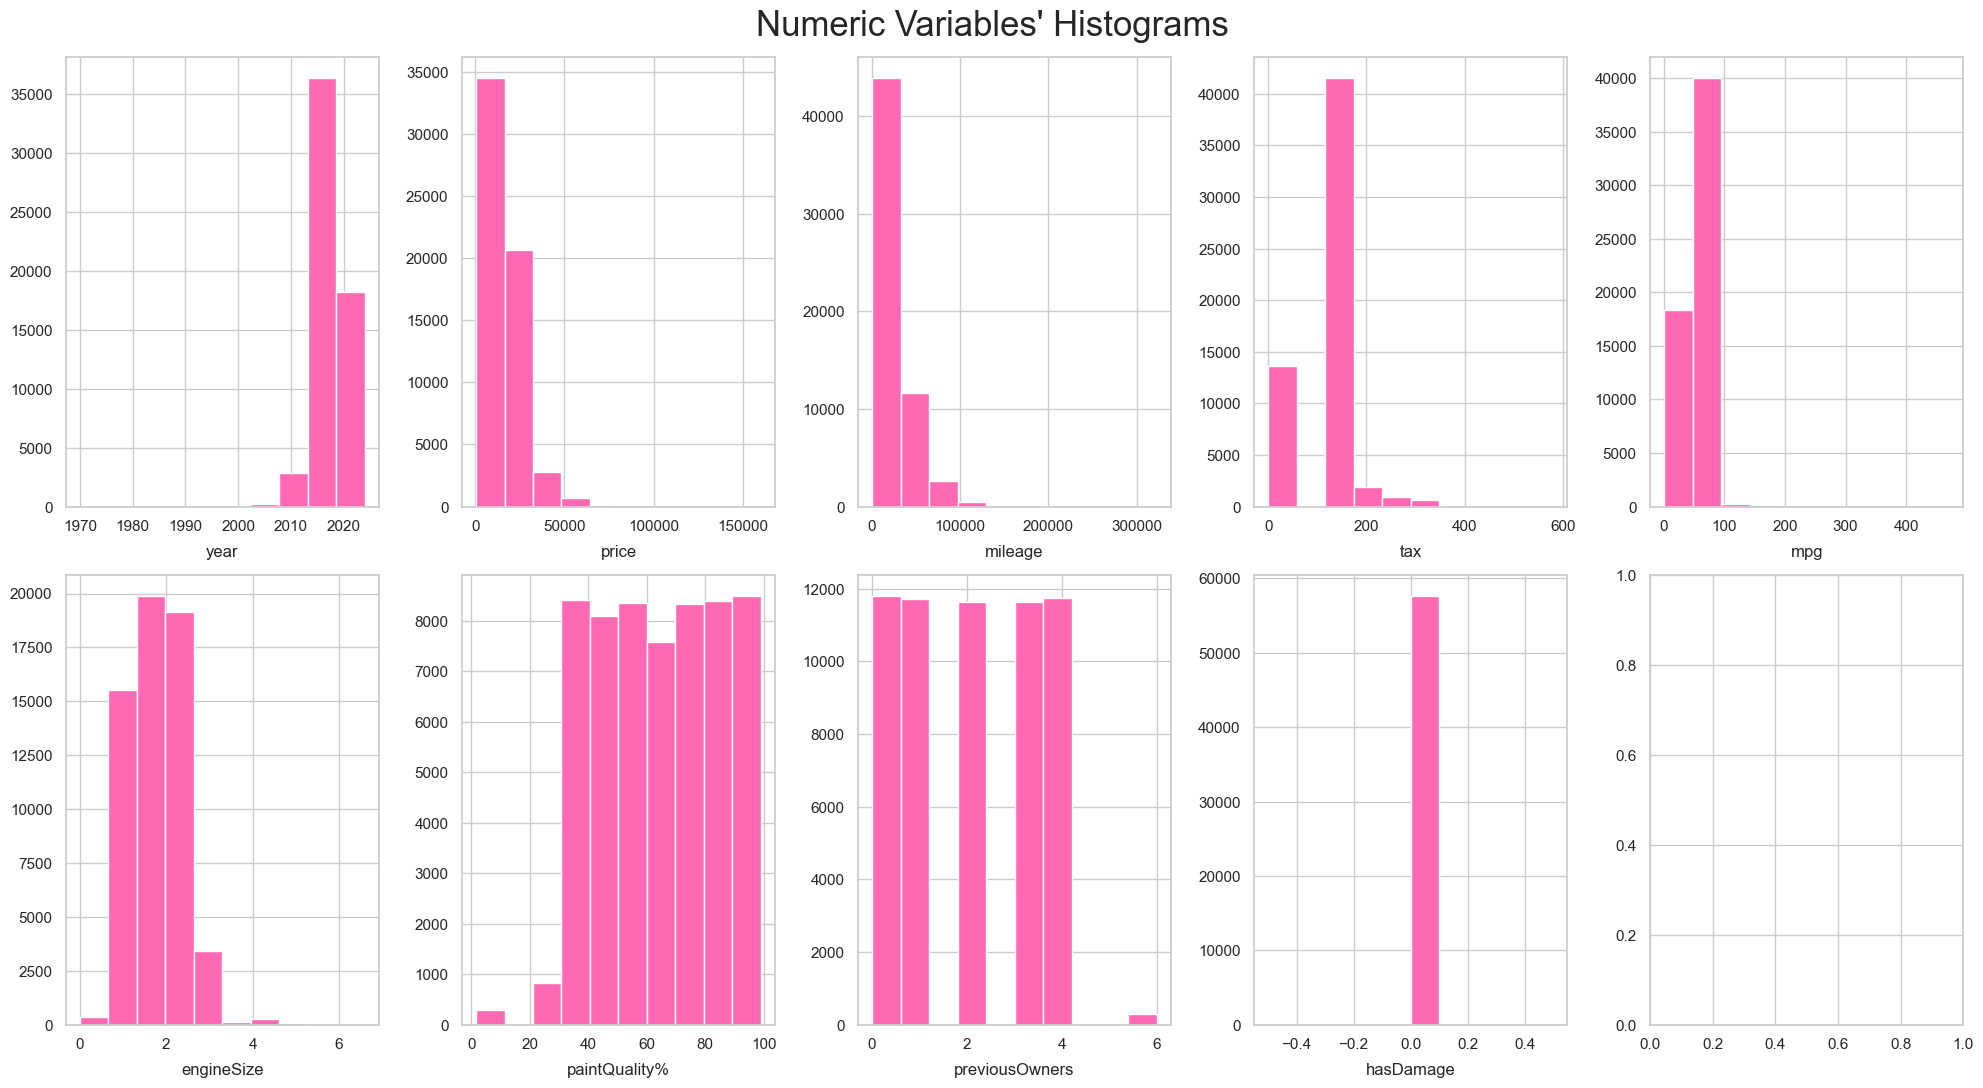

In [82]:
sns.set_style('whitegrid')

# We will put all the numeric variables' histograms in one figure
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(numeric_features) / 2 ), figsize = (20, 11))

for ax, feat in zip(axes.flatten(), numeric_features):
    ax.hist(df_train[feat], color = 'hotpink')
    ax.set_title(feat, y = -0.13)

# Add a centered title to the figure:
plt.suptitle("Numeric Variables' Histograms", fontsize=25)

plt.tight_layout()
plt.show()

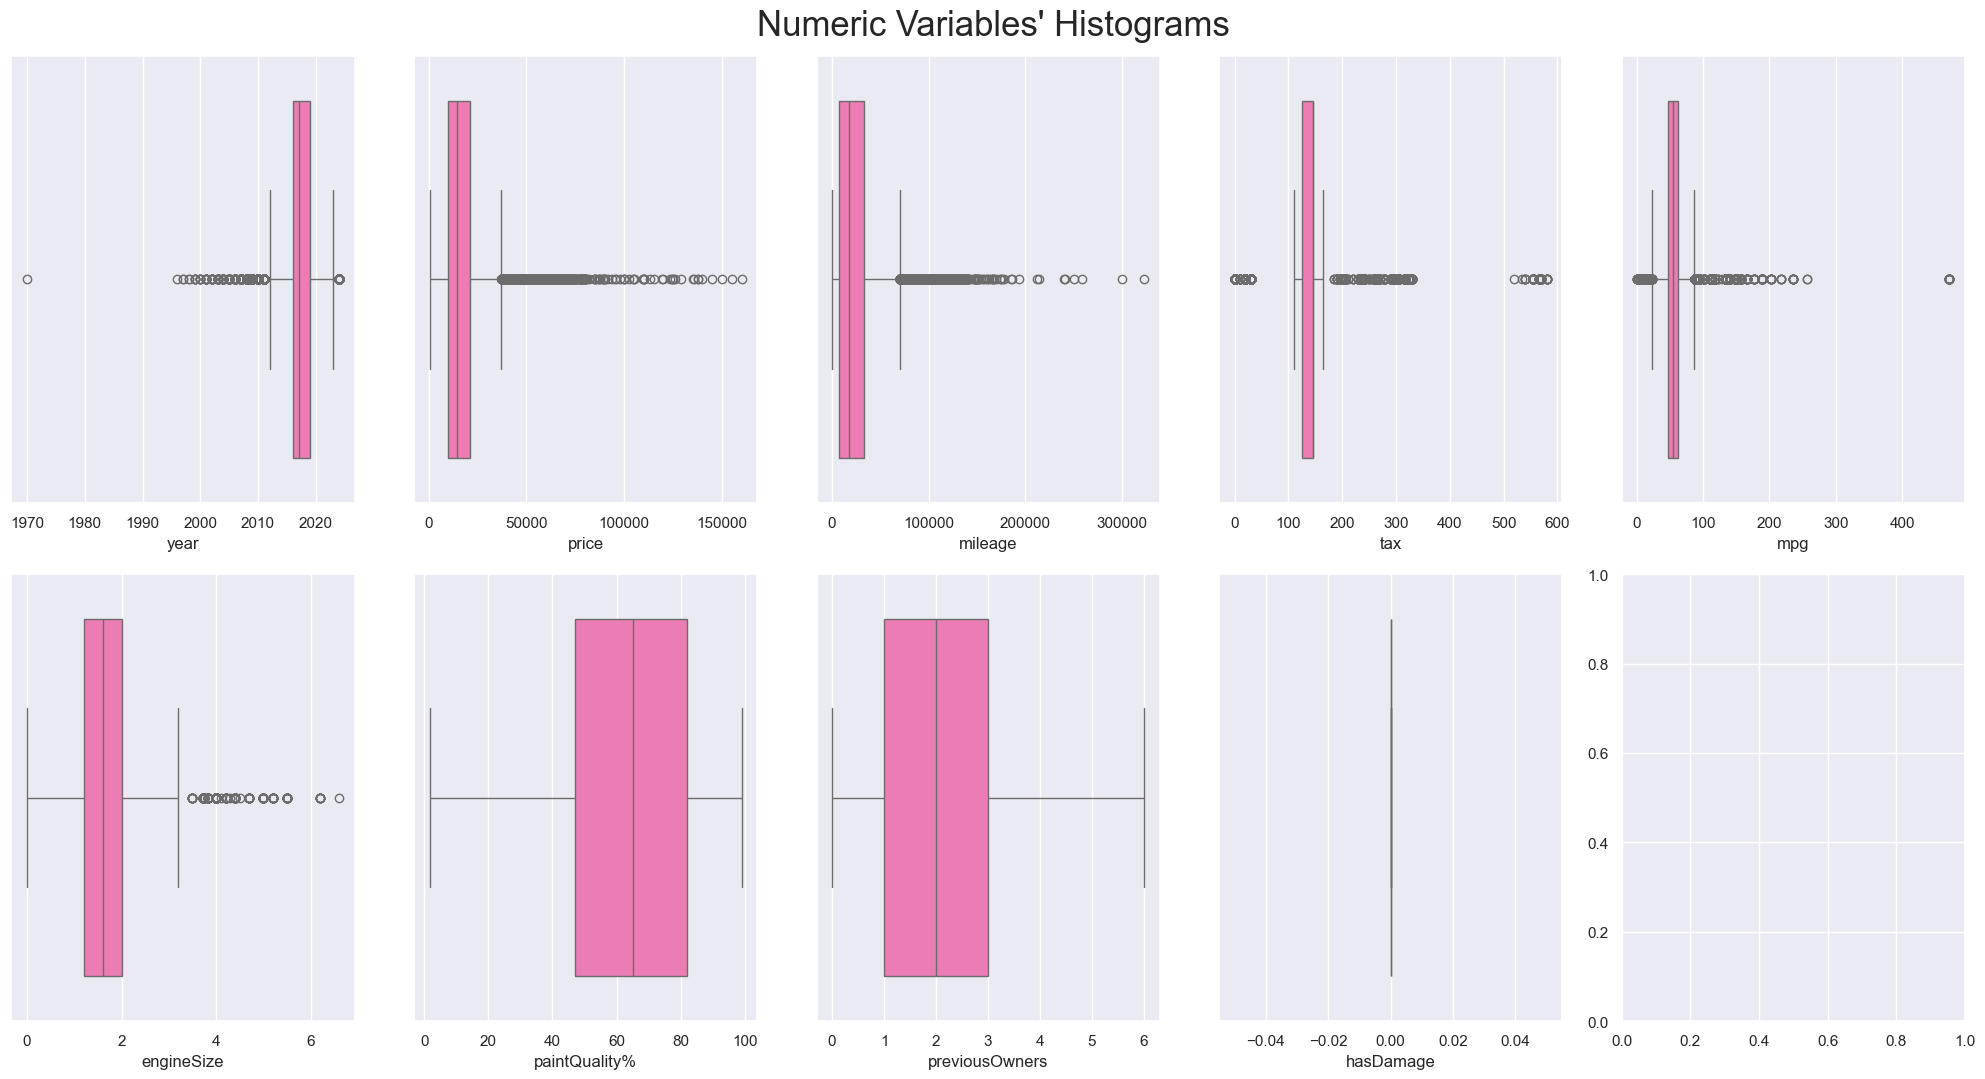

In [83]:
sns.set()

# We will put all the numeric variables' histograms in one figure
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(numeric_features) / 2 ), figsize = (20, 11))

for ax, feat in zip(axes.flatten(), numeric_features):
    sns.boxplot(x=df_train[feat], ax=ax, color='hotpink')

# Add a centered title to the figure:
plt.suptitle("Numeric Variables' Histograms", fontsize=25)

plt.tight_layout()
plt.show()

In [90]:
df_train_copy=df_train.copy()
df_train_copy["carID"] = df_train_copy.index

In [93]:
# # Obtain correlation matrix. 
# Round to 2 decimal places

numeric_with_carID=list(set(numeric_features).union(['carID']))
corr = df_train_copy[numeric_with_carID].corr(method="spearman")

corr = corr.round(2)
corr

,price,tax,engineSize,carID,mpg,previousOwners,paintQuality%,year,mileage,hasDamage
price,1.00,0.31,0.58,-0.23,-0.38,-0.00,0.00,0.59,-0.51,NaN
tax,0.31,1.00,0.16,-0.04,-0.56,-0.00,0.00,0.32,-0.26,NaN
engineSize,0.58,0.16,1.00,-0.21,-0.20,0.00,0.01,-0.03,0.10,NaN
carID,-0.23,-0.04,-0.21,1.00,-0.01,0.00,-0.01,0.01,-0.02,NaN
mpg,-0.38,-0.56,-0.20,-0.01,1.00,0.00,0.00,-0.31,0.33,NaN
previousOwners,-0.00,-0.00,0.00,0.00,0.00,1.00,-0.01,0.00,0.00,NaN
paintQuality%,0.00,0.00,0.01,-0.01,0.00,-0.01,1.00,0.01,-0.00,NaN
year,0.59,0.32,-0.03,0.01,-0.31,0.00,0.01,1.00,-0.79,NaN
mileage,-0.51,-0.26,0.10,-0.02,0.33,0.00,-0.00,-0.79,1.00,NaN
hasDamage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


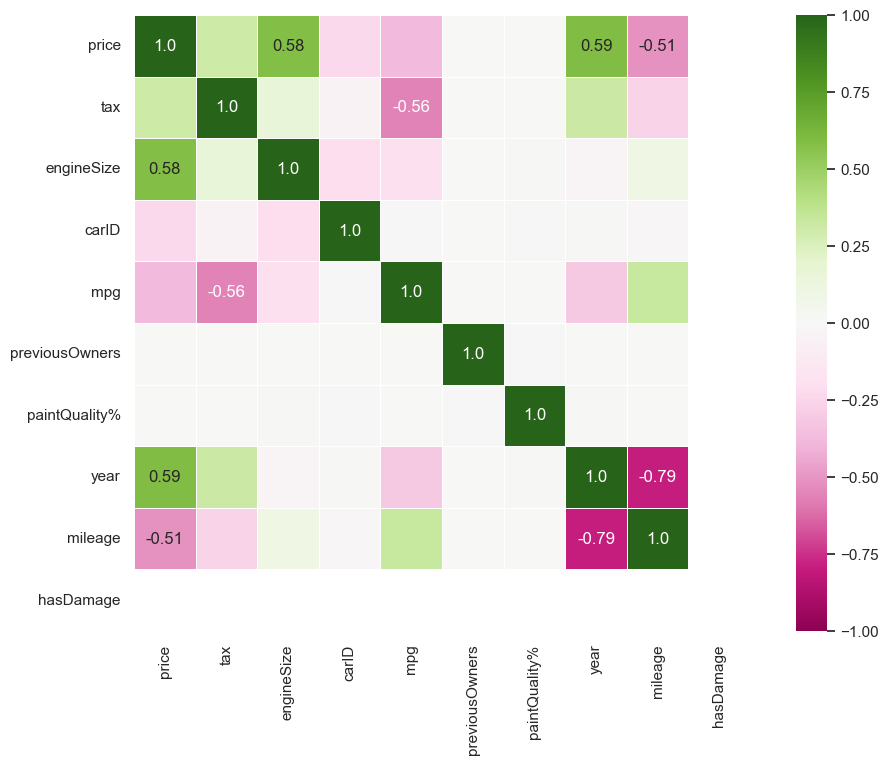

In [94]:
df_train

# Prepare figure
fig = plt.figure(figsize=(12, 8))

# percebr melhor o que está a acontecer aqui
mask_annot = np.absolute(corr.values) >= 0.5 
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 


# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, 
            annot=annot, # Specify custom annotation
            fmt='s', # The annotation matrix now has strings, so we need to explicitly say this
            vmin=-1, vmax=1, 
            center=0, # Center the colormap at zero
            square=True, # Make each cell square-shaped
            linewidths=.5, # Add lines between cells
            cmap='PiYG' # Diverging color map
            )

# ## Once you are happy, save this as an image
# # plt.savefig(os.path.join('..', 'figures', 'eda', 'correlation_matrix.png'), dpi=200)

plt.show()

# ## How can we improve this figure?

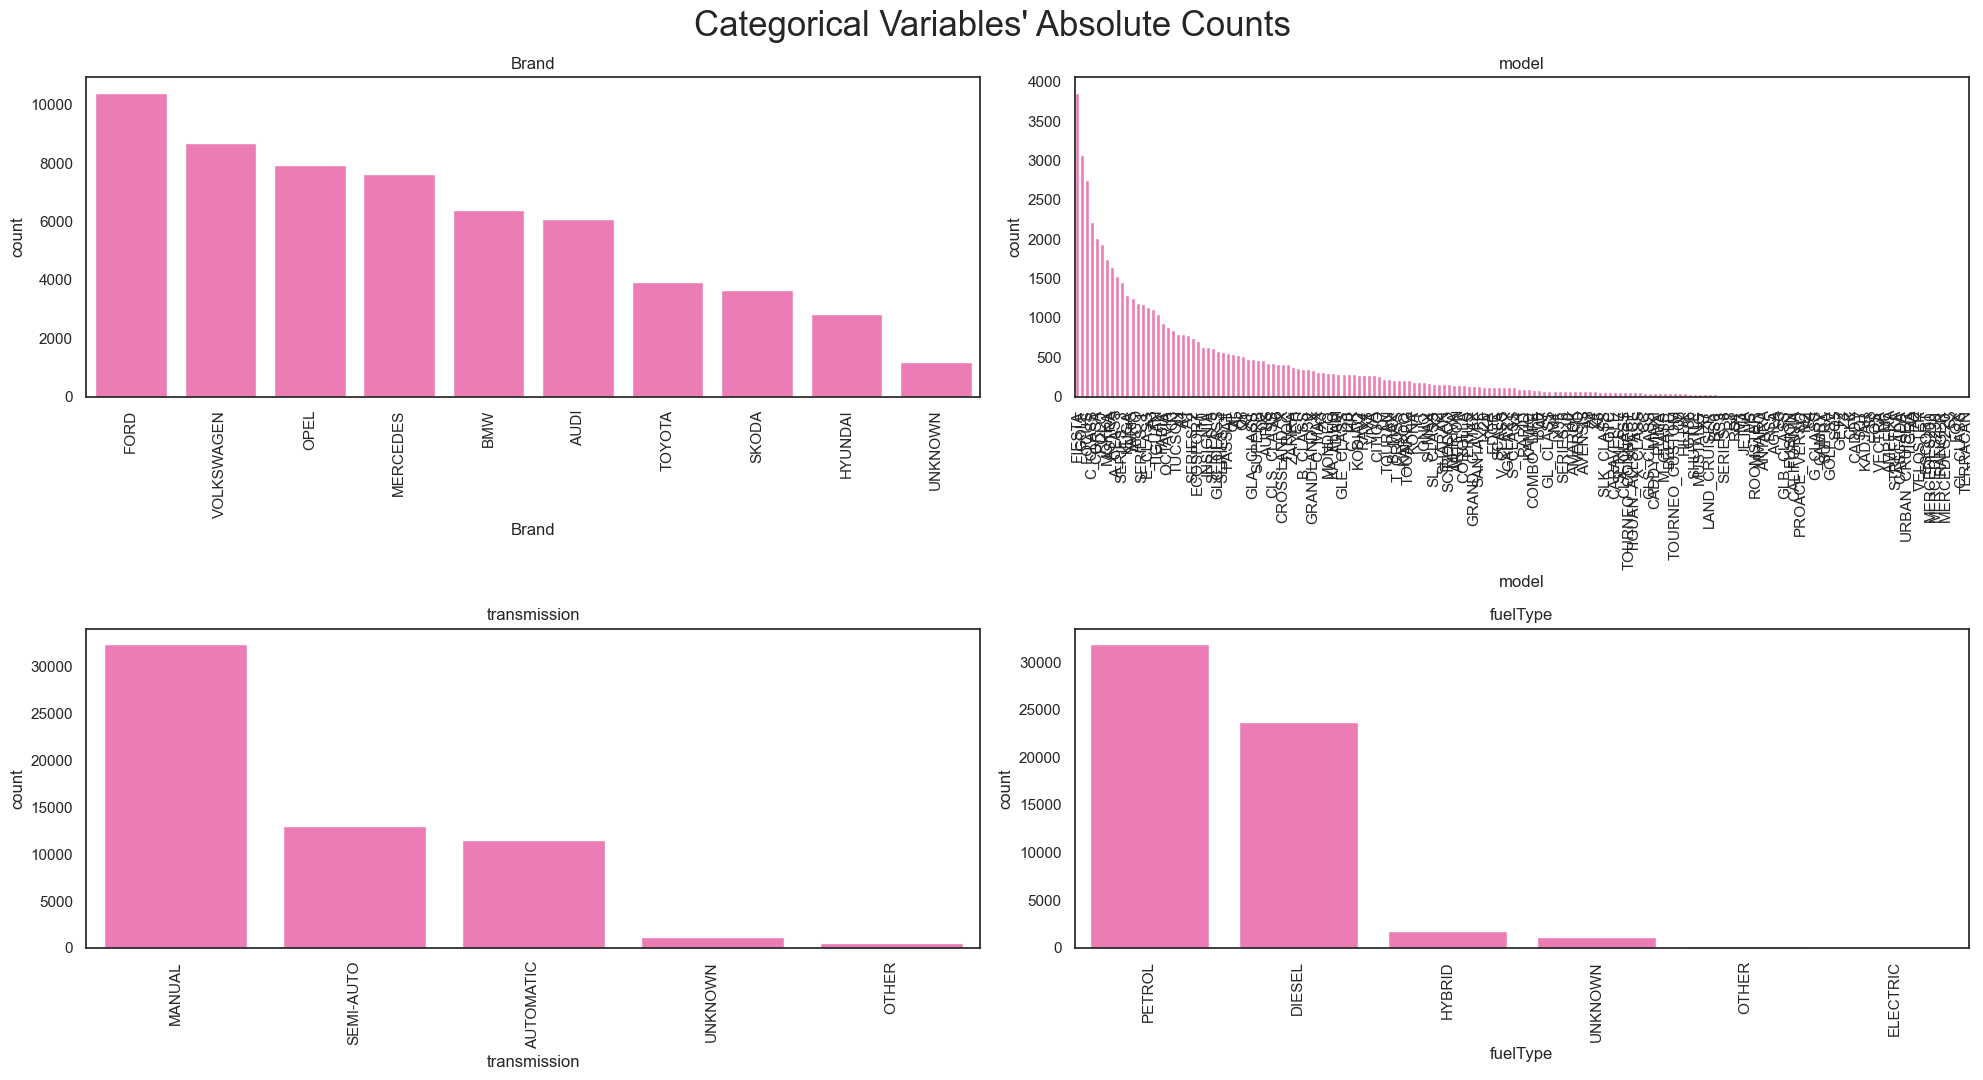

In [95]:
sns.set(style="white")

fig, axes = plt.subplots(
    2, 
    ceil(len(categorical_features) / 2), 
    figsize=(20, 11)
    )

for ax, feat in zip(axes.flatten(), categorical_features):
    sns.countplot(x=df_train[feat], ax=ax, 
                  order=df_train[feat].value_counts().index, color = 'hotpink') 
    ax.set_title(feat)
    ax.tick_params(axis='x', rotation=90)  # roda os labels no eixo x


plt.suptitle("Categorical Variables' Absolute Counts", fontsize=25)

plt.tight_layout()
plt.show()